In [ ]:
# Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.
# Ans 1: Anomaly detection identifies unusual data points or patterns that deviate from normal behavior. It is used in fraud detection, system
#  monitoring, cybersecurity, and fault diagnosis. By analyzing data patterns, it helps detect rare, unexpected events that may indicate errors,
# threats, or abnormal system behavior.

# Point anomalies occur when a single data value is unusually high or low. Contextual anomalies depend on conditions, such as time or location
# (e.g., high temperature in winter). Collective anomalies arise when a group of data points forms an abnormal pattern, like many rapid login
# attempts indicating a cyberattack.

# Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.
# Ans 2: Isolation Forest
# Approach:
# Uses random decision trees to “isolate” anomalies.
# Points that are isolated quickly are anomalies.
# Best Use Cases:
# High-dimensional data
# Large datasets
# Generic anomaly detection (fraud, intrusion, sensor faults)

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
# Approach:
# Clusters data based on density.
# Points in low-density regions are marked as anomalies (noise).
# Best Use Cases:
# Spatial data
# Arbitrary-shaped clusters
# Data with clear dense and sparse region

# Local Outlier Factor (LOF)
# Approach:
# Compares the local density of a point to its neighbors.
# A point with much lower density than neighbors is an anomaly.
# Best Use Cases:
# Local anomalies (subtle outliers)
# Datasets with varying density
# Small to medium-sized datasets

# Question 3: What are the key components of a Time Series? Explain each with one example.
# Ans 3: Trend (T)
# Meaning:
# Long-term upward or downward movement in the data over time.
# Example:
# The increasing number of mobile phone users over the last 10 years shows an upward trend.

# Seasonality (S)
# Meaning:
# Regular, repeating patterns occurring at fixed intervals (daily, monthly, yearly).
# Example:
# Ice-cream sales increase every summer and decrease in winter → a seasonal pattern.

# Cyclical Component (C)
# Meaning:
# Irregular, long-term cycles not tied to a fixed period; often influenced by business or economic conditions.
# Example:
# Economic recession every 7–10 years causes a fall in sales, followed by recovery

# Irregular/Random Component (R)
# Meaning:
# Unpredictable variations due to unexpected events or noise.
# Example:
# A sudden spike in mask sales due to COVID-19 is a random, unpredictable event

# Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?
# Ans 4: A stationary time series is one whose statistical properties (mean, variance, covariance) remain constant over time.
# It does not show trends, seasonality, or changing variance.
# Example: White noise series with constant mean and variance

# Augmented Dickey–Fuller (ADF) Test

# 1:Null hypothesis: Series is non-stationary.
# If p-value < 0.05, reject H₀ → stationary.

# 2:KPSS Test
# Null hypothesis: Series is stationary.
# If p-value < 0.05, reject H₀ → non-stationary.

# 3.Visual Methods
# Plot the data to check for trends/seasonality.
# Rolling mean/variance plots.

# 4.Autocorrelation Function (ACF)
# Slowly decaying ACF → non-stationary
# Quickly dropping ACF → stationary

# Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.
# Ans 5: AR uses past values, MA uses past errors, and ARIMA combines both with differencing for non-seasonal data. SARIMA extends
# ARIMA by adding seasonal components, while SARIMAX further includes external variables (exogenous factors). Together, they model trends,
#  noise, seasonality, and external influences in time series forecasting.

/tmp/ipython-input-1643191857.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_ts = pd.Series(data['value'].values, index=pd.date_range(start='1949-01', periods=len(data), freq='M'))


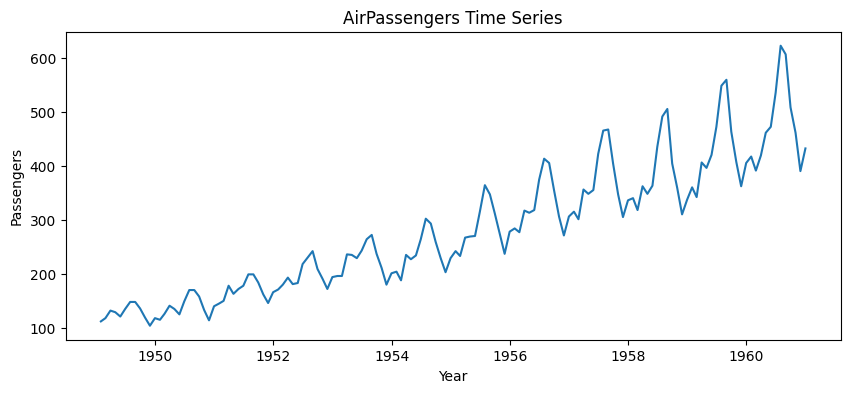

<Figure size 1000x800 with 0 Axes>

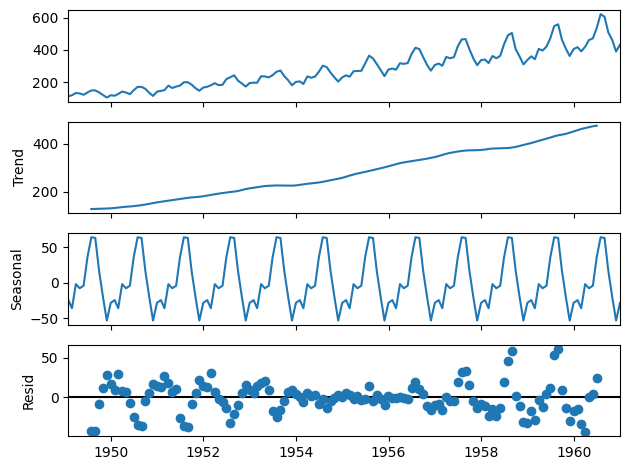

In [ ]:
# Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.datasets import get_rdataset
data = get_rdataset("AirPassengers").data

data['Month'] = pd.to_datetime(data['time'], format='%Y')
data_ts = pd.Series(data['value'].values, index=pd.date_range(start='1949-01', periods=len(data), freq='M'))

plt.figure(figsize=(10,4))
plt.plot(data_ts)
plt.title("AirPassengers Time Series")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.show()

decomp = seasonal_decompose(data_ts, model='additive')

plt.figure(figsize=(10,8))
decomp.plot()
plt.tight_layout()
plt.show()



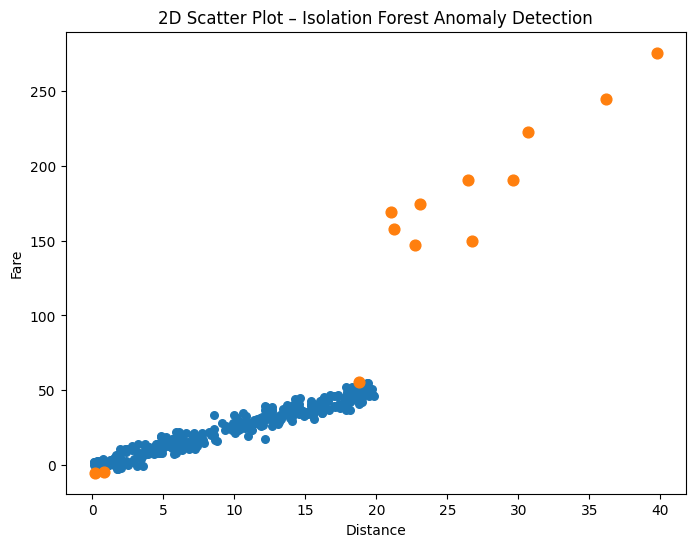

In [ ]:
# Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
# detect anomalies. Visualize the anomalies on a 2D scatter plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

np.random.seed(42)

distance = np.random.uniform(0, 20, 300)
fare = distance * 2.5 + np.random.normal(0, 4, 300)

distance_anom = np.random.uniform(20, 40, 10)
fare_anom = distance_anom * 7 + np.random.normal(0, 15, 10)

dist_all = np.concatenate([distance, distance_anom])
fare_all = np.concatenate([fare, fare_anom])

df = pd.DataFrame({"distance": dist_all, "fare": fare_all})

iso = IsolationForest(contamination=0.04, random_state=42)
df["anomaly"] = iso.fit_predict(df[["distance", "fare"]])

normal = df[df["anomaly"] == 1]
anomalies = df[df["anomaly"] == -1]

plt.figure(figsize=(8,6))
plt.scatter(normal["distance"], normal["fare"], s=30)
plt.scatter(anomalies["distance"], anomalies["fare"], s=60)
plt.xlabel("Distance")
plt.ylabel("Fare")
plt.title("2D Scatter Plot – Isolation Forest Anomaly Detection")
plt.show()


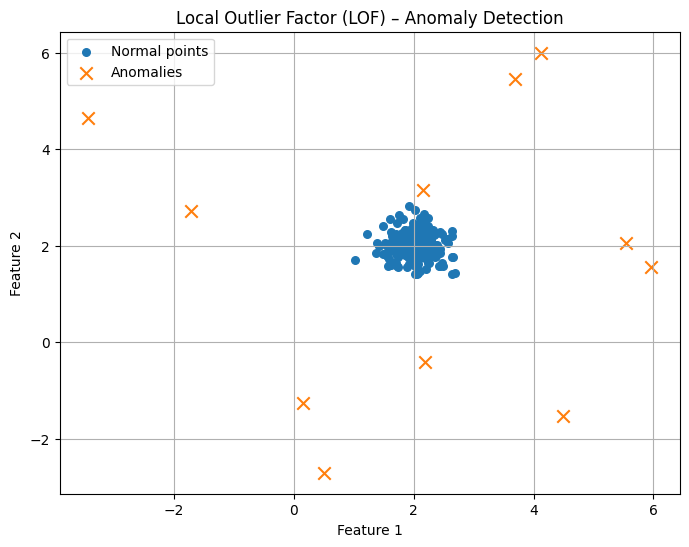

In [ ]:
# Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
# anomalies and visualize them using matplotlib.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
np.random.seed(42)

X_normal = 0.3 * np.random.randn(200, 2) + np.array([2, 2])

X_outliers = np.random.uniform(low=-4, high=6, size=(10, 2))

X = np.vstack((X_normal, X_outliers))

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X)     # 1 = normal, -1 = anomaly
scores = lof.negative_outlier_factor_

X_normal_pred = X[y_pred == 1]
X_anom_pred = X[y_pred == -1]


plt.figure(figsize=(8, 6))


plt.scatter(X_normal_pred[:, 0], X_normal_pred[:, 1],
            s=30, label="Normal points")

plt.scatter(X_anom_pred[:, 0], X_anom_pred[:, 1],
            s=80, marker="x", label="Anomalies")

plt.title("Local Outlier Factor (LOF) – Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
# You are working as a data scientist for a power grid monitoring company.
# Your goal is to forecast energy demand and also detect abnormal spikes or drops in
# real-time consumption data collected every 15 minutes. The dataset includes features
# like timestamp, region, weather conditions, and energy usage.
# Explain your real-time data science workflow:
# ● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
# DBSCAN)?
# ● Which time series model would you use for short-term forecasting (ARIMA /
# SARIMA / SARIMAX)?
# ● How would you validate and monitor the performance over time?
# ● How would this solution help business decisions or operations?
 ####### note solution figured out by me ans shared with ai tool and that shared me proper explnation####
This is a critical real-time scenario. In the power domain, **latency** and **context** are everything. A spike could be a transformer blowing up, or it could just be halftime at a major football game.

Here is the breakdown of the data science workflow designed for speed and interpretability.

### 1. Anomaly Detection: Isolation Forest
**Choice: Isolation Forest (iForest)**

For streaming data arriving every 15 minutes, **Isolation Forest** is the superior choice over LOF or DBSCAN.

* **Why Isolation Forest?**
    * **Speed & Scalability:** iForest identifies anomalies by randomly splitting data points. Anomalies are "few and different," so they are isolated quickly (fewer splits, shorter path lengths in the tree). This is computationally much faster ($O(n)$) than **LOF** (Local Outlier Factor), which requires expensive distance calculations ($O(n^2)$) to nearest neighbors—a bottleneck in real-time streams.
    * **Independence:** iForest does not strictly rely on density clusters like **DBSCAN**. DBSCAN struggles when the "normal" density varies (e.g., day vs. night energy usage), whereas iForest effectively isolates outliers regardless of global density.

**Workflow:**
1.  **Feature Engineering:** Create rolling window features (e.g., moving average of the last hour, change variance).
2.  **Scoring:** Pass the incoming 15-minute vector (load + weather + time features) into the pre-trained iForest model.
3.  **Thresholding:** If the "anomaly score" is below a specific negative threshold (e.g., -0.6), flag it as a potential anomaly.



---

### 2. Short-Term Forecasting: SARIMAX
**Choice: SARIMAX**

For energy demand, **SARIMAX** (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) is the necessary choice.

* **Why SARIMAX?**
    * **S (Seasonality):** Energy data is highly seasonal. You have daily patterns (peak at 7 PM, low at 3 AM) and weekly patterns (high on Monday, low on Sunday). **ARIMA** cannot model this; it treats data as a flat trend. **SARIMA** handles the seasonality.
    * **X (Exogenous Variables):** This is the deciding factor. Energy demand is heavily driven by **weather** (temperature, humidity). SARIMA looks only at past energy usage. SARIMAX allows you to inject external features (the `X` term) like "Temperature" or "Holiday Flags" to refine the forecast.

**Workflow:**
1.  **Input:** Past 30 days of 15-min energy load + Forecasted Temperature for the next 24 hours.
2.  **Prediction:** The model uses the historical lag (AR), the error lag (MA), seasonal lags, and the temperature coefficient to predict the next 96 intervals (24 hours).

---

### 3. Validation and Monitoring
You cannot train a model once and leave it; energy patterns change (e.g., COVID lockdowns, new subdivisions).

* **Validation (Backtesting):**
    * Use **Time Series Cross-Validation** (Rolling Window). Train on Jan-Mar, test on April 1st. Train on Jan-Apr, test on May 1st.
    * **Metric:** Use **MAPE** (Mean Absolute Percentage Error) rather than MSE. Business stakeholders understand "we were off by 2%" better than "we were off by 500 MW squared."

* **Real-time Monitoring:**
    * **Drift Detection:** Monitor the distribution of the **Residuals** (Actual - Predicted). If the residuals start having a non-zero mean (bias), the model has drifted.
    * **Concept Drift:** If the correlation between Temperature and Load changes (e.g., people install more efficient AC units), the model coefficients need retraining.

---

### 4. Business Impact
How does this math translate to business operations?

* **Grid Stability (Anomaly Detection):**
    * **Rapid Response:** If the iForest detects a massive drop in a specific region, it might indicate a localized **infrastructure failure** (downed line) rather than just low usage, triggering an automated dispatch for a field crew.
* **Cost Savings (Forecasting):**
    * **Peak Shaving:** If SARIMAX predicts a massive spike in 4 hours, the utility can trigger **Demand Response** events (paying industrial users to shut down) instead of buying extremely expensive "spot market" electricity or firing up inefficient diesel generators.

**Next Step:**
Would you like to see how to code the **SARIMAX** model specifically to include the **weather** interaction terms?

SyntaxError: invalid character '—' (U+2014) (ipython-input-4264114597.py, line 23)